In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Dataset (Breast Cancer dataset)
data = load_breast_cancer(as_frame=True)
df = data.frame

In [3]:
# Data Understanding
print("\nInitial Data Overview:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())


Initial Data Overview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  wors

In [4]:
# Data Preprocessing
X = df.drop(columns=['target'])
y = df['target']

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Decision Tree Model Training
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [7]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9122807017543859

Confusion Matrix:
 [[39  3]
 [ 7 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



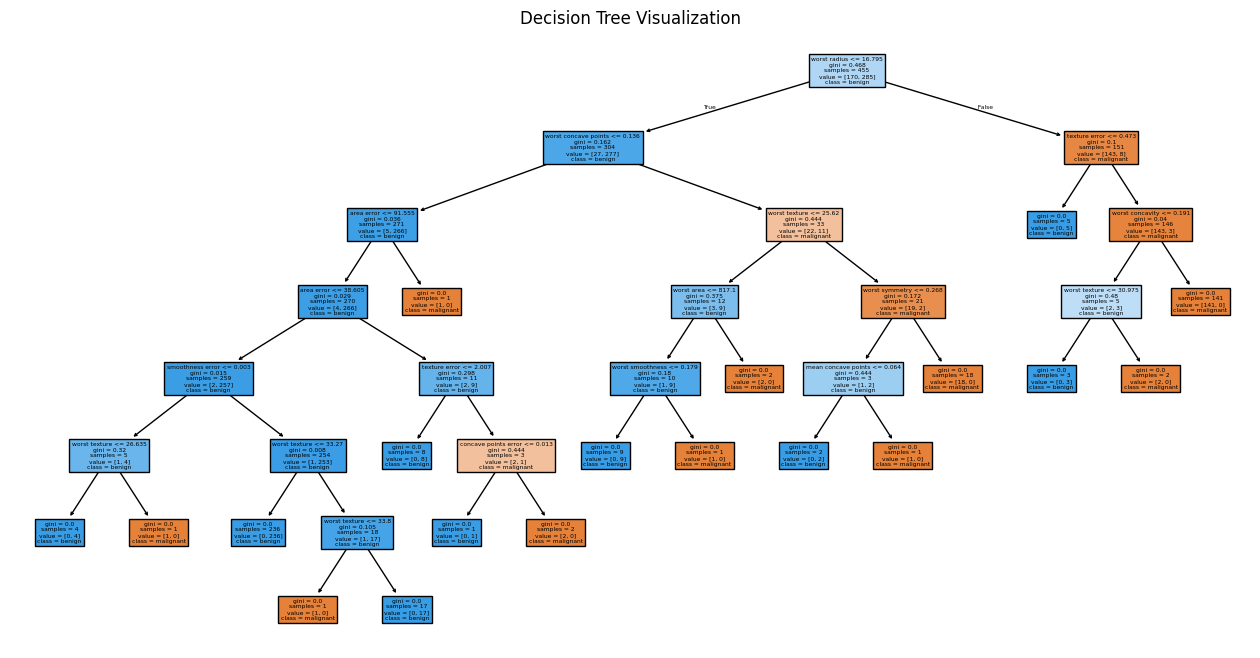

In [8]:
# Visualization of Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=data.target_names)
plt.title("Decision Tree Visualization")
plt.show()

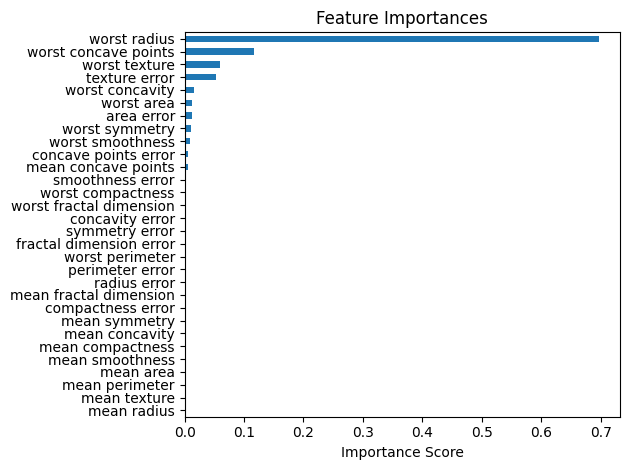

In [9]:
# Feature Importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', title="Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()